In [2]:
import numpy as np

In [ ]:
datas = [1, 2, 3] # accually, we use proper dataset; MNIST, CIFER, etc...

In [11]:
from numpy import ndarray


def sample_real_data(m: int):
    return np.random.normal(loc=2.0, scale=2.5, size=(m, 1))

def sample_noise_data(m: int):
    return np.random.uniform(low=0, high=1, size=(m, 1))

def generator(z, theta_g):
    a, b = theta_g
    return a*z + b


def discriminater(x, theta_d):
    w, b = theta_d
    return 1/(1 + np.exp(-w*x + b))

def update_discriminater(theta_d, theta_g, m, lr=0.1):
    w, b = theta_d
    x = sample_real_data(m)
    z = sample_noise_data(m)
    g_z = generator(z, theta_g)

    D_real = discriminater(x, theta_d)
    D_fake = discriminater(g_z, theta_d)


    # gradients (d/dw, d/db)
    grad_w = np.mean((1 - D_real) * x - D_fake * g_z)
    grad_b = np.mean((1 - D_real) - D_fake)

    w += lr * grad_w
    b += lr * grad_b

    return (w, b)

def update_generator(theta_d, theta_g, m, lr=0.1):
    a, b = theta_g
    z = sample_noise_data(m)
    g_z = generator(z, theta_g)

    D_fake = discriminater(g_z, theta_d)

    grad_a = np.mean((1 - D_fake) * z)
    grad_b = np.mean((1 - D_fake))

    a += lr * grad_a
    b += lr * grad_b

    return (a, b)
    

# まずは整数配列をデータとして一時的に使う
# Args
# m: a size of minibatch
# k: a number of training steps
def learn(m: int, k: int):
    theta_d = (np.random.randn(), np.random.randn())
    theta_g = (np.random.randn(), np.random.randn())

    for step in range(k):
        theta_d = update_discriminater(theta_d, theta_g, m)
        theta_g = update_generator(theta_d, theta_g, m)
    
        if step % 100 == 0:
            print(f"Step: {step}, theta_d: {theta_d}, theta_g: {theta_g}")




In [12]:
learn(m=64, k=1000)

Step: 0, theta_d: (np.float64(-0.461082172906327), np.float64(-1.6669076237965827)), theta_g: (np.float64(0.832023753338859), np.float64(-0.2070828918071631))
Step: 100, theta_d: (np.float64(-1.6736717750566414), np.float64(-10.68190417666741)), theta_g: (np.float64(0.9554714292153093), np.float64(0.03319030153978525))
Step: 200, theta_d: (np.float64(-3.305123978380799), np.float64(-20.18795409919461)), theta_g: (np.float64(0.9555153849604827), np.float64(0.0332581546420495))
Step: 300, theta_d: (np.float64(-4.88735919712538), np.float64(-29.68741431303247)), theta_g: (np.float64(0.9555153961048216), np.float64(0.03325816982730161))
Step: 400, theta_d: (np.float64(-6.309318864018267), np.float64(-39.17772410586163)), theta_g: (np.float64(0.955515396108095), np.float64(0.033258169831369824))
Step: 500, theta_d: (np.float64(-7.776318554966309), np.float64(-48.67724614089641)), theta_g: (np.float64(0.9555153961080953), np.float64(0.03325816983137075))
Step: 600, theta_d: (np.float64(-9.43

100%|██████████| 9.91M/9.91M [00:31<00:00, 315kB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 168kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 843kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.48MB/s]


Epoch [1/20] | D loss: 0.3049 | G loss: 1.7877
Epoch [2/20] | D loss: 0.2464 | G loss: 2.6144
Epoch [3/20] | D loss: 0.3705 | G loss: 0.9488
Epoch [4/20] | D loss: 0.3230 | G loss: 3.1514
Epoch [5/20] | D loss: 0.7065 | G loss: 0.7097


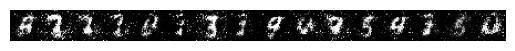

Epoch [6/20] | D loss: 0.1521 | G loss: 2.7654
Epoch [7/20] | D loss: 0.2080 | G loss: 2.5796
Epoch [8/20] | D loss: 1.0302 | G loss: 2.5927
Epoch [9/20] | D loss: 0.1454 | G loss: 1.7700
Epoch [10/20] | D loss: 0.1703 | G loss: 3.0201


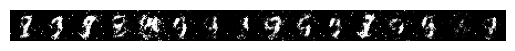

Epoch [11/20] | D loss: 0.1589 | G loss: 3.1414
Epoch [12/20] | D loss: 0.1468 | G loss: 3.4977
Epoch [13/20] | D loss: 0.2797 | G loss: 4.6010
Epoch [14/20] | D loss: 0.3899 | G loss: 2.3490
Epoch [15/20] | D loss: 0.2747 | G loss: 3.4528


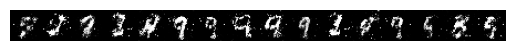

Epoch [16/20] | D loss: 0.3134 | G loss: 1.7901
Epoch [17/20] | D loss: 0.4144 | G loss: 2.5026
Epoch [18/20] | D loss: 0.7237 | G loss: 0.4007
Epoch [19/20] | D loss: 0.3996 | G loss: 1.4092
Epoch [20/20] | D loss: 0.5628 | G loss: 2.8215


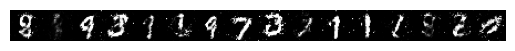

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

latent_dim = 100   # size of noise z
img_size = 28 * 28
batch_size = 128
lr = 0.0002
epochs = 20

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # scale to [-1,1]
])
dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, img_size),
            nn.Tanh()
        )
    def forward(self, z):
        return self.net(z)

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(img_size, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid() # 正解である確率を出したい
        )
    def forward(self, x):
        return self.net(x)

G = Generator()
D = Discriminator()

criterion = nn.BCELoss()
optimizer_D = optim.Adam(D.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_G = optim.Adam(G.parameters(), lr=lr, betas=(0.5, 0.999))

def learn(m: int, k: int, datas):
    for epoch in range(k):
        for i, (imgs, _) in enumerate(datas):
            real_imgs = imgs.view(-1, img_size)
            batch_size = real_imgs.size(0)

            #  Train Discriminator
            z = torch.randn(batch_size, latent_dim)
            fake_imgs = G(z).detach()

            real_labels = torch.ones(batch_size, 1)
            fake_labels = torch.zeros(batch_size, 1)

            D_real = D(real_imgs)
            D_fake = D(fake_imgs)

            loss_D_real = criterion(D_real, real_labels)
            loss_D_fake = criterion(D_fake, fake_labels)
            loss_D = (loss_D_real + loss_D_fake) / 2

            optimizer_D.zero_grad()
            loss_D.backward()
            optimizer_D.step()

            #  Train Generator
            z = torch.randn(batch_size, latent_dim)
            fake_imgs = G(z)
            D_fake = D(fake_imgs)
            loss_G = criterion(D_fake, real_labels)  # want D(fake)=1

            optimizer_G.zero_grad()
            loss_G.backward()
            optimizer_G.step()

        print(f"Epoch [{epoch+1}/{k}] | D loss: {loss_D.item():.4f} | G loss: {loss_G.item():.4f}")

        if (epoch + 1) % 5 == 0:
            show_generated(G)

def show_generated(G):
    z = torch.randn(16, latent_dim)
    with torch.no_grad():
        gen_imgs = G(z).view(-1, 1, 28, 28)
    grid = torch.cat([gen_imgs[i] for i in range(16)], dim=2)
    plt.imshow(grid.permute(1, 2, 0).squeeze().cpu().numpy(), cmap="gray")
    plt.axis("off")
    plt.show()

learn(m=batch_size, k=epochs, datas=loader)
